# **Data Loading**



In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2025-10-21 10:45:14--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.2’

aclImdb_v1.tar.gz.2 100%[===================>]  80.23M  45.1MB/s    in 1.8s    

2025-10-21 10:45:16 (45.1 MB/s) - ‘aclImdb_v1.tar.gz.2’ saved [84125825/84125825]



In [2]:
!tar xvzf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [3]:
import os
def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())
  return data

# Import Libraries

In [4]:
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# from nltk.stem import PorterStemmer
# from nltk.stem import SnowballStemmer

from nltk.stem import WordNetLemmatizer

from nltk import pos_tag

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create DataFrame

In [5]:
df_train_pos = pd.DataFrame({'review' : fetch_reviews('aclImdb/train/pos/'), 'label' : 1})
df_train_neg = pd.DataFrame({'review' : fetch_reviews('aclImdb/train/neg/'), 'label' : 0})

df_test_pos = pd.DataFrame({'review' : fetch_reviews('aclImdb/test/pos/'), 'label' : 1})
df_test_neg = pd.DataFrame({'review' : fetch_reviews('aclImdb/test/neg/'), 'label' : 0})

df_concat = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg])

df_concat.to_csv('reviews.csv', index=False)

# Exploratory Data Analysis

In [6]:
df_concat.head()

,review,label
0,This final Voyager episode begins 23 years in ...,1
1,"Tight script, good direction, excellent perfor...",1
2,Don't think of this movies as just another kid...,1
3,I just purchased and viewed the DVD of this fi...,1
4,"While the prices have gone up a lot, and some ...",1


In [7]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
df_concat['label'].value_counts()

,count
label,
1,25000
0,25000


# Preprocessing

## Text Cleaning

In [9]:
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

df_concat['review'] = df_concat['review'].apply(clean_text)
df_concat.head()

,review,label
0,this final voyager episode begins 23 years in ...,1
1,tight script good direction excellent performa...,1
2,dont think of this movies as just another kids...,1
3,i just purchased and viewed the dvd of this fi...,1
4,while the prices have gone up a lot and some o...,1


## Downloading NLTK Resources

In [10]:
resources = [
    'stopwords',
    'punkt_tab',
    'wordnet',
    'averaged_perceptron_tagger_eng'
]

for resource in resources:
    nltk.download(resource, quiet=True)

## Remove StopWords

In [11]:
stop_words = set(stopwords.words('english'))

df_concat['review'] = df_concat['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_concat.head()

,review,label
0,final voyager episode begins 23 years future v...,1
1,tight script good direction excellent performa...,1
2,dont think movies another kids movie whole fam...,1
3,purchased viewed dvd film dvd transfer last ye...,1
4,prices gone lot details become dated homeowner...,1


## Tokenization

In [12]:
df_concat['review'] = df_concat['review'].apply(word_tokenize)
df_concat.head()

,review,label
0,"[final, voyager, episode, begins, 23, years, f...",1
1,"[tight, script, good, direction, excellent, pe...",1
2,"[dont, think, movies, another, kids, movie, wh...",1
3,"[purchased, viewed, dvd, film, dvd, transfer, ...",1
4,"[prices, gone, lot, details, become, dated, ho...",1


# Stemming

In [13]:
##PorterStemmer
# stemmer = PorterStemmer()

# df_concat['review'] = df_concat['review'].apply(lambda x: [stemmer.stem(word) for word in x])
# df_concat.head()

In [14]:
#Snowball stemmer
# stemmer = SnowballStemmer('english')

# df_concat['review'] = df_concat['review'].apply(lambda x: [stemmer.stem(word) for word in x])
# df_concat.head()

# Lemmatization

In [15]:
lemmatizer = WordNetLemmatizer()

df_concat['review'] = df_concat['review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_concat.head()

,review,label
0,"[final, voyager, episode, begin, 23, year, fut...",1
1,"[tight, script, good, direction, excellent, pe...",1
2,"[dont, think, movie, another, kid, movie, whol...",1
3,"[purchased, viewed, dvd, film, dvd, transfer, ...",1
4,"[price, gone, lot, detail, become, dated, home...",1


# Part-of-Speech (POS) Tagging

In [16]:
df_concat['review'] = df_concat['review'].apply(lambda x: pos_tag(x))
df_concat.head()

,review,label
0,"[(final, JJ), (voyager, NN), (episode, NN), (b...",1
1,"[(tight, JJ), (script, NN), (good, JJ), (direc...",1
2,"[(dont, JJ), (think, VBP), (movie, NN), (anoth...",1
3,"[(purchased, VBN), (viewed, VBN), (dvd, JJ), (...",1
4,"[(price, NN), (gone, VBN), (lot, NN), (detail,...",1


# Vecorization

In [17]:
df_copy = df_concat.copy()

In [18]:
#countVectorizer
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(df_copy['review'].apply(lambda x: ' '.join([word[0] for word in x])))
y_count = df_copy['label']

df_copy.head()

,review,label
0,"[(final, JJ), (voyager, NN), (episode, NN), (b...",1
1,"[(tight, JJ), (script, NN), (good, JJ), (direc...",1
2,"[(dont, JJ), (think, VBP), (movie, NN), (anoth...",1
3,"[(purchased, VBN), (viewed, VBN), (dvd, JJ), (...",1
4,"[(price, NN), (gone, VBN), (lot, NN), (detail,...",1


In [19]:
#TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_concat['review'].apply(lambda x: ' '.join([word[0] for word in x])))
y = df_concat['label']

df_concat.head()

,review,label
0,"[(final, JJ), (voyager, NN), (episode, NN), (b...",1
1,"[(tight, JJ), (script, NN), (good, JJ), (direc...",1
2,"[(dont, JJ), (think, VBP), (movie, NN), (anoth...",1
3,"[(purchased, VBN), (viewed, VBN), (dvd, JJ), (...",1
4,"[(price, NN), (gone, VBN), (lot, NN), (detail,...",1


# Model Training and Evaluation

## Import Libraries

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(10, 10))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

## LogisticRegression

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4945
           1       0.88      0.90      0.89      5055

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



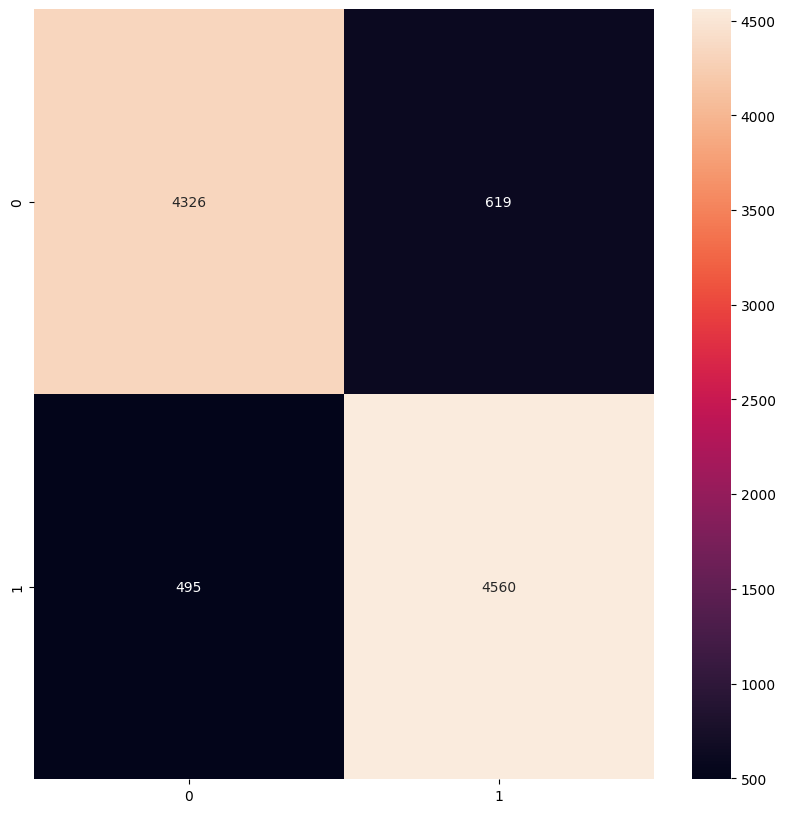

In [23]:
logistick_model = LogisticRegression()
evaluate_model(logistick_model, X_train, y_train, X_test, y_test)

## KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      4945
           1       0.75      0.85      0.80      5055

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



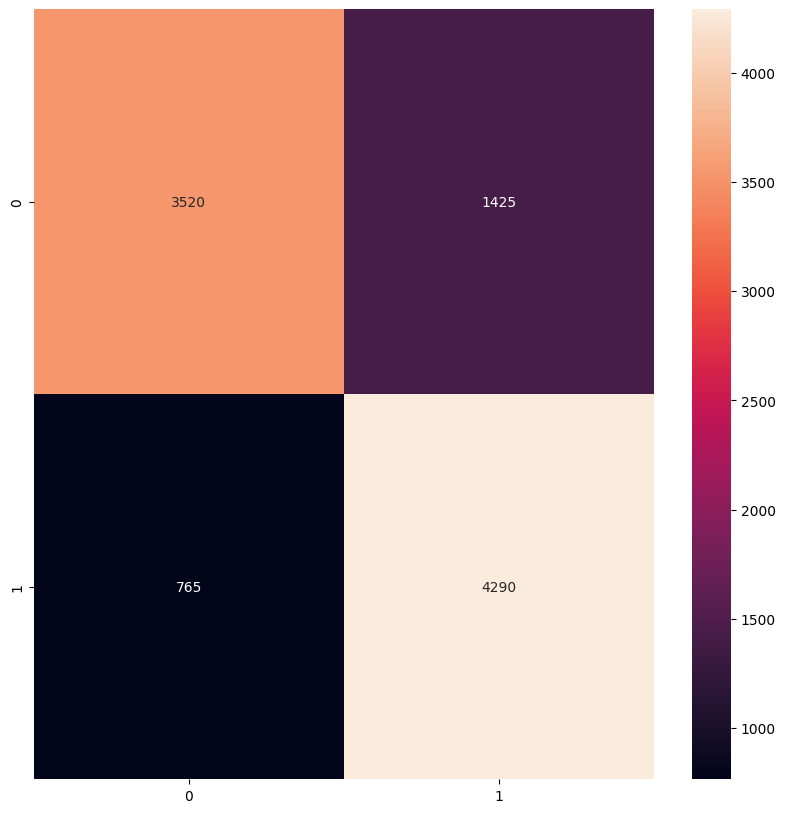

In [24]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, y_train, X_test, y_test)

## RandomForestClassifier

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4945
           1       0.85      0.85      0.85      5055

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



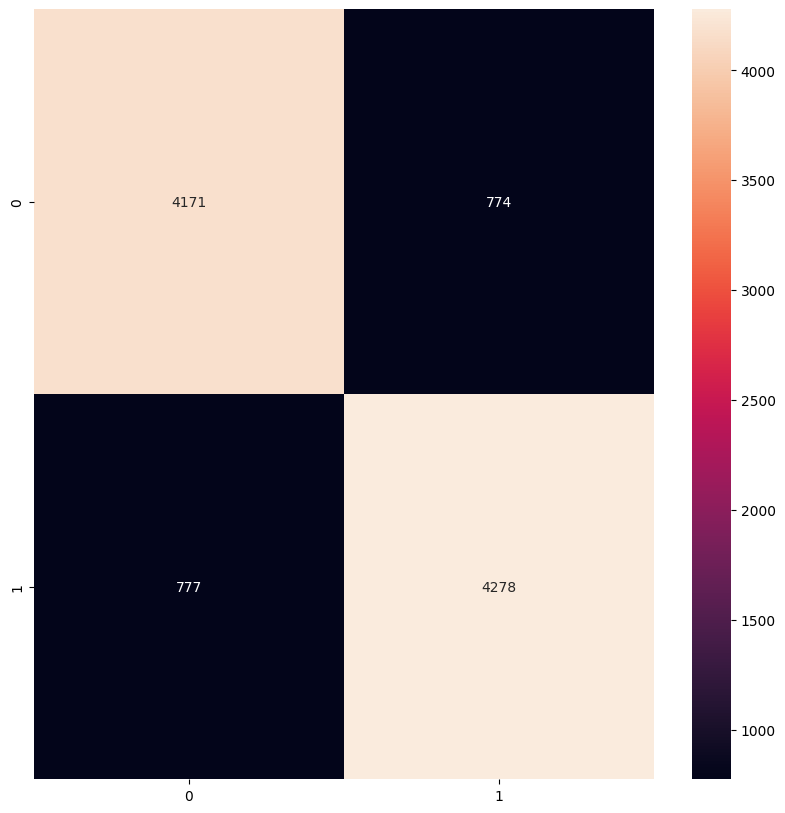

In [25]:
rf_model = RandomForestClassifier()
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

## XGBoost


              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4945
           1       0.84      0.87      0.85      5055

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



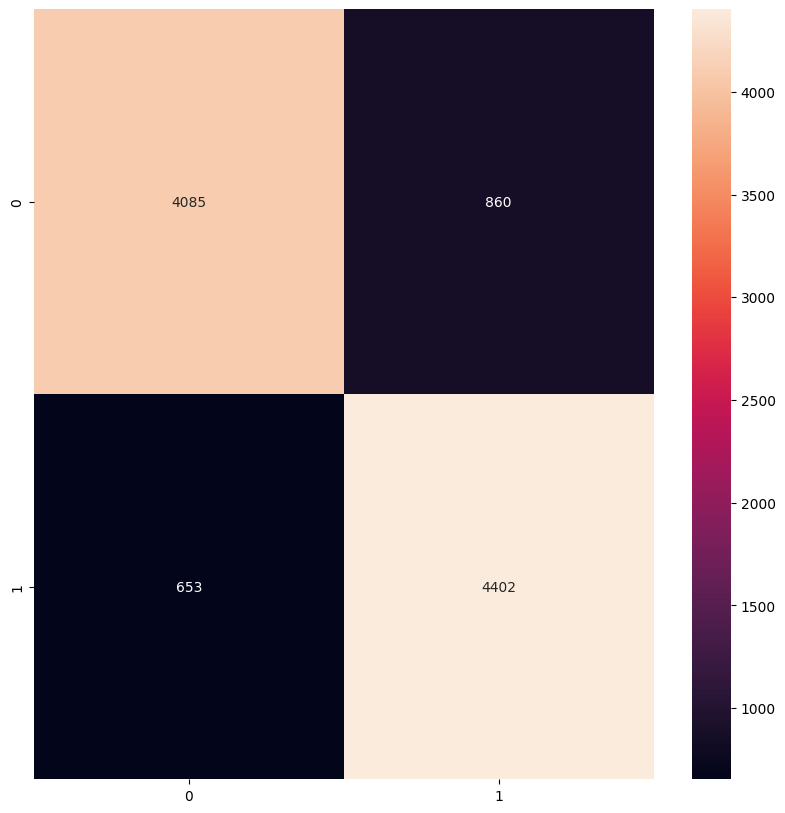

In [26]:
xgb_model = XGBClassifier()
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)